<a href="https://colab.research.google.com/github/joynaomi81/Iris-Flower-Classification-/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import os

Load dataset

In [4]:
df= pd.read_csv('/content/drive/MyDrive/IRIS.csv')

Exploratory Data Analysis

In [31]:
# Check for the first 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
# Check for the last 5 rows
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
# Data shape
df.shape

(150, 5)

In [8]:
#Sample of each class
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [11]:
df['sepal_length'].isnull()

,sepal_length
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [12]:
df['sepal_width'].isnull()

,sepal_width
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [13]:
df['petal_length'].isnull()

,petal_length
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [14]:
df['petal_width'].isnull()

,petal_width
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [15]:
df['species'].isnull()

,species
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


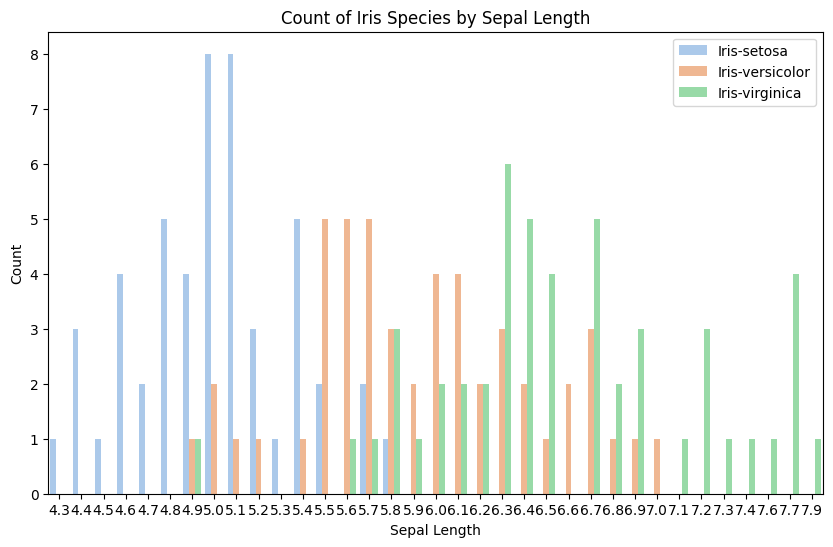

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sepal_length', hue='species', palette='pastel')
plt.title('Count of Iris Species by Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.legend()
plt.show()


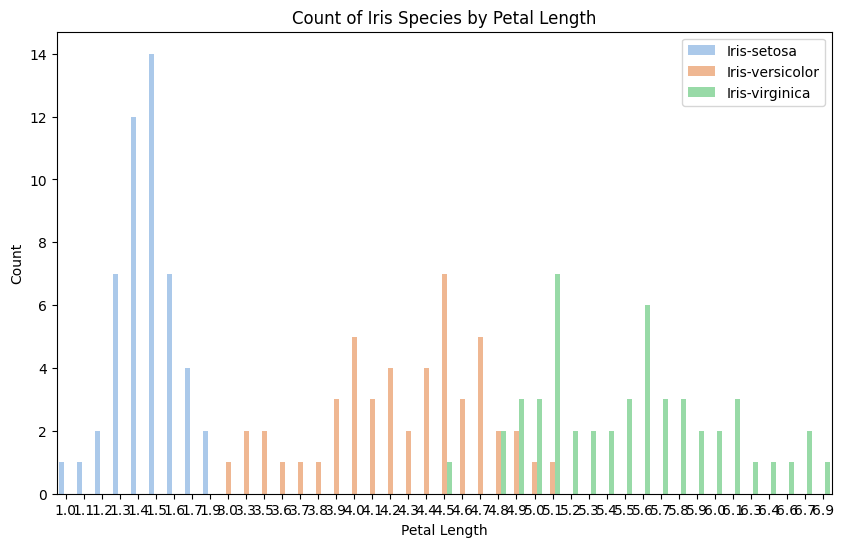

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='petal_length', hue='species', palette='pastel')
plt.title('Count of Iris Species by Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.legend()
plt.show()


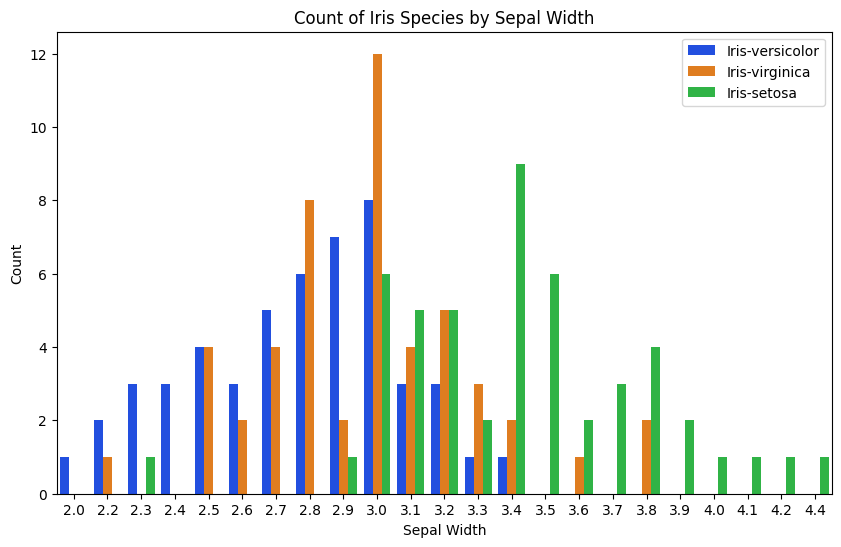

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sepal_width', hue='species', palette='bright')
plt.title('Count of Iris Species by Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.legend()
plt.show()


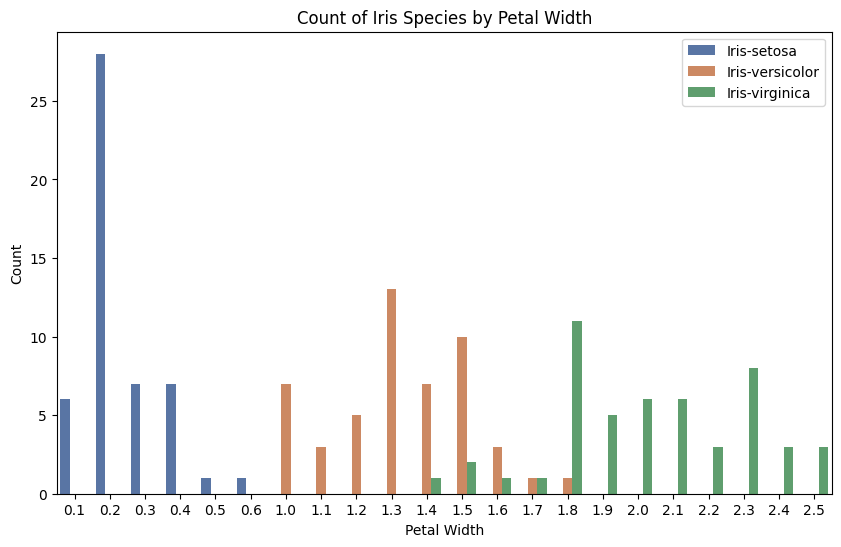

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='petal_width', hue='species', palette='deep')
plt.title('Count of Iris Species by Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Count')
plt.legend()
plt.show()


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

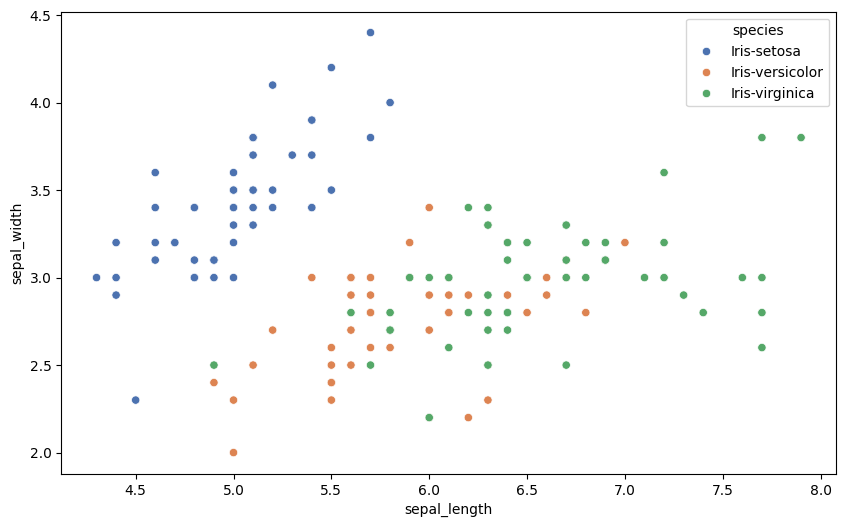

In [20]:
#scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', palette='deep')


<Axes: xlabel='petal_length', ylabel='petal_width'>

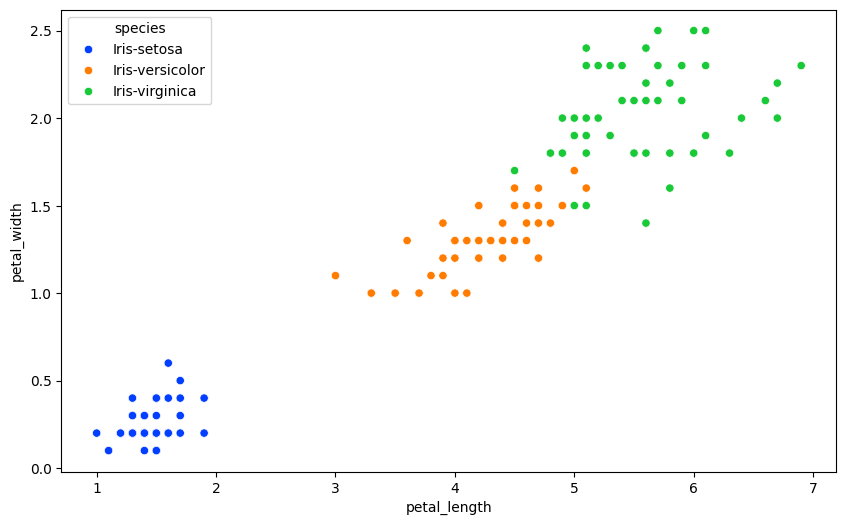

In [21]:
#scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='bright')


Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [23]:
x = df.drop(['species'],axis= 1)
y = df['species']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)


In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(x_train, y_train)
lr.score(x_train,y_train)

0.9619047619047619

In [27]:
y_pred = lr.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [28]:
y_test

,species
73,Iris-versicolor
18,Iris-setosa
118,Iris-virginica
78,Iris-versicolor
76,Iris-versicolor
31,Iris-setosa
64,Iris-versicolor
141,Iris-virginica
68,Iris-versicolor
82,Iris-versicolor


In [37]:
# Make predictions
pred = lr.predict(x_test)
pred[2]

'Iris-virginica'

In [36]:
y_test.iloc[2]

'Iris-virginica'

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

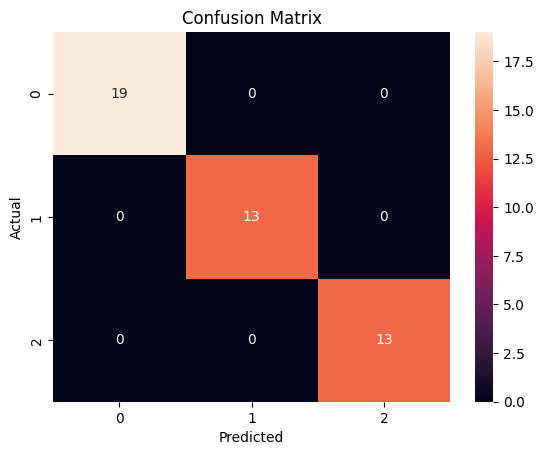

In [30]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()